In [63]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

A. Data Wrangling & Feature Engineering (45 marks):
1. Prepare the data for downstream processes, e.g., deal with missing values, duplicates
2. Determine the frequency of distinct values in each feature set
3. Initialize a function to plot relevant features within the dataset to visualize for outliers
4. Count the frequency of negative Age feature observations, and remove them
5. The values within AwaitingTime are negative, transform them into positive values
6. ML algorithm requires the variables to be coded into its equivalent integer codes. Encode the string
categorical values into an integer code
7. Separate the date features into date components
8. ML algorithms work best when the input data are scaled to a narrow range around zero. Rescale the
age feature with a normalizing (e.g., min_max normalization) or standardization (e.g., z_score
standardization) function.
9. Conduct variability comparison between features using a correlation matrix & drop correlated feature

In [64]:
# READING THE DATA
df = pd.read_csv('MedicalCentre.csv')
print(df[:5])

      PatientID  AppointmentID Gender          ScheduledDay  \
0  2.990000e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.590000e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.260000e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.680000e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.840000e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay   Age      Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z  62.0    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z  56.0    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z  62.0      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z   8.0  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z  56.0    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handicap  SMS_received No-show  
0         0           0         0             0      No  
1         0           0       

In [65]:
# Determine the frequency of unique values in each column

for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print('')
    

PatientID
8.220000e+14    141
3.350000e+13    127
7.580000e+13    124
8.190000e+13    123
2.690000e+13    117
               ... 
6.978773e+10      1
9.847957e+10      1
4.226995e+10      1
5.734915e+10      1
9.481592e+10      1
Name: PatientID, Length: 6100, dtype: int64

AppointmentID
5642903    1
5692618    1
5687640    1
5740664    1
5740598    1
          ..
5718442    1
5426425    1
5424230    1
5720832    1
5629448    1
Name: AppointmentID, Length: 110527, dtype: int64

Gender
F    71840
M    38687
Name: Gender, dtype: int64

ScheduledDay
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-02T09:53:25Z     1
2016-05-30T09:12:28Z     1
2016-05-16T09:10:04Z     1
2016-05-09T10:17:48Z     1
2016-04-27T13:30:56Z     1
Name: ScheduledDay, Length: 103549, dtype: int64

AppointmentDay
2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    452

In [66]:
# Drop rows with negative values in column 'Age'

for row in df.index:
    if df.loc[row, 'Age'] < 0:
        df.drop(row, inplace=True)

df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [67]:
# check for duplicates & drop them
print(len(df))
df = df.drop_duplicates()
print(len(df))


110526
110526


In [68]:
# DATA PREPROCESSING
# Dropping the columns that are not required
df = df.drop(['PatientID','AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Scholarship'], axis=1)

In [69]:
# removing the rows with missing values
# print lenght of df before removing the rows with missing values
print(len(df))
df = df.dropna()
print(len(df))
# only 3 rows were removed!

110526
110523


In [70]:

# converting the categorical variables to numerical variables

df.reset_index(drop=True, inplace=True)
gdr = df.loc[:,'Gender']


encg = []


for i in gdr:
    if i == 'M':
        encg.append(1)
    else:
        encg.append(0)


df['Gender'] = encg


In [71]:
nsh = df.loc[:,'No-show']
encn = []

for i in nsh:
    if i == 'No':
        encn.append(0)
    else:
        encn.append(1)

df['No-show'] = encn

In [72]:
neighs = df.Neighbourhood.unique()

# check if there is a correlation between the neighbourhood and the no-show
# if there is a correlation, then we can use the neighbourhood as a feature
# if there is no correlation, then we can drop the neighbourhood column

# creating a dictionary with the neighbourhoods and the number of no-shows
neighs_dict = {}
for i in neighs:
    neighs_dict[i] = 0

for i in range(len(df)):
    if df.loc[i, 'No-show'] == 1:
        neighs_dict[df.loc[i, 'Neighbourhood']] += 1

# creating a list with the neighbourhoods and the number of no-shows

neighs_dict # printing the neighbourhoods and the number of no-shows

# For this model, we will NOT use the neighbourhood as a feature, observe that if there exists a trend between neighborhoods, the variance of
# the model will be high, and the model will not be able to generalize well with the 81 unique neighborhoods, and many neighborhoods have variance in
# the number of patients, which many overfit the model for such neighborhoods. Thus, we will drop the neighbourhood column.

df = df.drop(['Neighbourhood'], axis=1)

    

In [73]:
# Convert the Age column to int64
df['Age'] = df['Age'].astype('int64')

# scale the age column to be between 0 and 1
df['Age'] = df['Age']/df['Age'].max()

# round the age column to 2 decimal places
df['Age'] = df['Age'].round(3)

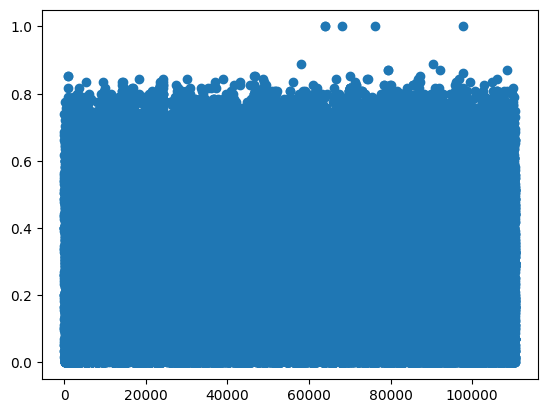

In [74]:
# plot the distribution of the age column to see if there are any outliers in a scatter plot
plt.scatter(df.index, df['Age'])
plt.show()


In [75]:
# We have now converted the categorical variables to numerical variables, and we have removed the rows with missing values,
# and we have removed unnecessary columns. now we can start building the model.
df.head()

# create a csv file with the preprocessed data
df.to_csv('preprocessed_data.csv', index=False)
